In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
df = pd.read_csv(r'merged.csv')
print(len(df))
df.head()

1870455


,Unnamed: 0,session_id,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_behavior_is_shuffle,skip_score,liking,rating
0,0,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,-0.5,0.2,0,0,0.2,0.4,0,-0.3,0.6,0.3
1,1,0_00a20441-f168-41c7-9bf6-93ddeb022f00,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.2,0,0,0.2,0.4,0,0.2,0.6,0.8
2,2,0_00e25cfa-fb17-4c17-a126-04dc55c66259,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.2,0,0,0.2,0.4,0,0.2,0.6,0.8
3,3,0_05c168a6-d905-427e-8a6a-4b12311fcb6d,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.0,1,0,0.3,1.0,0,1.0,1.3,2.3
4,4,0_05d6ac38-9e98-44de-b097-048f1c0f95db,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.0,1,0,1.0,1.0,0,1.0,2.0,3.0


In [3]:
df['rating'].describe()

count    1.870440e+06
mean     1.257080e+00
std      1.475866e+00
min     -1.300000e+00
25%      3.000000e-01
50%      1.000000e+00
75%      2.600000e+00
max      4.000000e+00
Name: rating, dtype: float64

In [4]:
df['rating_round'] = df['rating'].round()

In [5]:
df.head()



,Unnamed: 0,session_id,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_behavior_is_shuffle,skip_score,liking,rating,rating_round
0,0,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,-0.5,0.2,0,0,0.2,0.4,0,-0.3,0.6,0.3,0.0
1,1,0_00a20441-f168-41c7-9bf6-93ddeb022f00,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.2,0,0,0.2,0.4,0,0.2,0.6,0.8,1.0
2,2,0_00e25cfa-fb17-4c17-a126-04dc55c66259,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.2,0,0,0.2,0.4,0,0.2,0.6,0.8,1.0
3,3,0_05c168a6-d905-427e-8a6a-4b12311fcb6d,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.0,1,0,0.3,1.0,0,1.0,1.3,2.3,2.0
4,4,0_05d6ac38-9e98-44de-b097-048f1c0f95db,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.0,1,0,1.0,1.0,0,1.0,2.0,3.0,3.0


In [12]:
 # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
df = df.dropna()
len(df)
df.columns

Index(['Unnamed: 0', 'session_id', 'track_id', 'skip_1', 'skip_2', 'skip_3',
       'not_skipped', 'context_switch', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end', 'hist_user_behavior_is_shuffle',
       'skip_score', 'liking', 'rating', 'rating_round'],
      dtype='object')

In [13]:
X = df[['skip_1','skip_2','skip_3','hist_user_behavior_reason_start','hist_user_behavior_reason_end','hist_user_behavior_is_shuffle']]
X = X.values
print(X)


[[ 0.  -0.5  0.2  0.2  0.4  0. ]
 [ 0.   0.   0.2  0.2  0.4  0. ]
 [ 0.   0.   0.2  0.2  0.4  0. ]
 ...
 [-1.  -0.5  0.2  0.3  0.3  1. ]
 [ 0.  -0.5  0.2  0.3  0.3  1. ]
 [ 0.   0.   0.   1.   1.   0. ]]


In [14]:
y = df[['rating_round']]
y = y.values
print(y)

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [3.]]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

[-1.  1. -0. ... -1.  2. -0.]
Accuracy: 0.9711369160910446


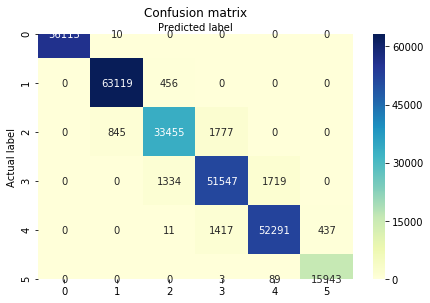

Accuracy: 0.9711369160910446
Precision: [1.         0.9866352  0.9489165  0.94160091 0.96657979 0.97332112]
Recall: [0.99982182 0.99282737 0.92732212 0.94408425 0.96556245 0.99426255]
F1 Score: [0.9999109  0.9897216  0.93799504 0.94284094 0.96607085 0.98368039]


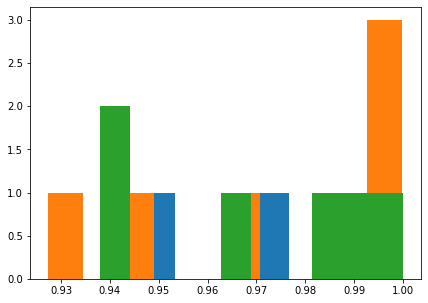

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[-1.  1. -0. ... -1.  2. -0.]
Accuracy: 0.9791956259846168


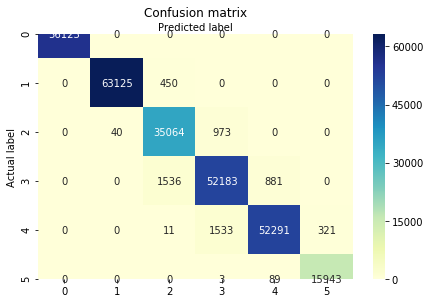

Accuracy: 0.9791956259846168
Precision: [1.         0.99936674 0.94611586 0.95412492 0.9817878  0.98026316]
Recall: [1.         0.99292175 0.97192117 0.9557326  0.96556245 0.99426255]
F1 Score: [1.         0.99613382 0.95884492 0.95492808 0.97360753 0.98721323]


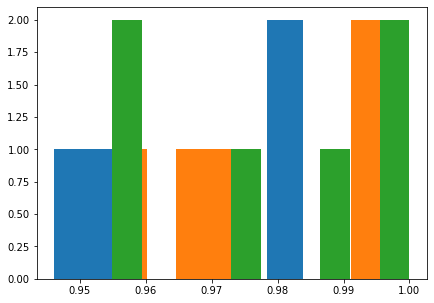

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
### Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
dtree_accuracy = metrics.accuracy_score(y_test, y_pred)
dtree_precision_score = metrics.precision_score(y_test, y_pred, average=None)
dtree_recall_score = metrics.recall_score(y_test, y_pred, average=None)
dtree_f1_score = metrics.f1_score(y_test, y_pred, average=None)
print("Accuracy:",dtree_accuracy)
print("Precision:",dtree_precision_score)
print("Recall:",dtree_recall_score)
print("F1 Score:", dtree_f1_score)
plt.figure(figsize=(7,5))
plt.hist(dtree_precision_score)
plt.hist(dtree_recall_score)
plt.hist(dtree_f1_score)
plt.show()


### RandomForestClassifier ####

from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(max_depth=None, max_leaf_nodes=20)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

rftree_accuracy = metrics.accuracy_score(y_test, y_pred)
rftree_precision_score = metrics.precision_score(y_test, y_pred, average=None)
rftree_recall_score = metrics.recall_score(y_test, y_pred, average=None)
rftree_f1_score = metrics.f1_score(y_test, y_pred, average=None)
print("Accuracy:",rftree_accuracy)
print("Precision:",rftree_precision_score)
print("Recall:",rftree_recall_score)
print("F1 Score:", rftree_f1_score)
plt.figure(figsize=(7,5))
plt.hist(rftree_precision_score)
plt.hist(rftree_recall_score)
plt.hist(rftree_f1_score)
plt.show()


#### SVM Classifier

from sklearn import svm
model = svm.SVC(kernel='rbf', C=1E6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

svm_accuracy = metrics.accuracy_score(y_test, y_pred)
svm_precision_score = metrics.precision_score(y_test, y_pred, average=None)
svm_recall_score = metrics.recall_score(y_test, y_pred, average=None)
svm_f1_score = metrics.f1_score(y_test, y_pred, average=None)
print("Accuracy:",svm_accuracy)
print("Precision:",svm_precision_score)
print("Recall:",svm_recall_score)
print("F1 Score:", svm_f1_score)
plt.figure(figsize=(7,5))
plt.hist(svm_precision_score)
plt.hist(svm_recall_score)
plt.hist(svm_f1_score)
plt.show()
 

In [ ]:
model_accuracy = [dtree_accuracy,rftree_accuracy,svm_accuracy]
model_accuracy = pd.DataFrame(model_accuracy)
sns.heatmap(model_accuracy)
plt.show()

model_accuracy

In [ ]:
model_precision = [dtree_precision_score,rftree_precision_score,svm_precision_score]
model_precision = pd.DataFrame(model_precision)
sns.heatmap(model_precision)
plt.show()

model_precision

In [ ]:
model_recall = [dtree_recall_score,rftree_recall_score,svm_recall_score]
model_recall = pd.DataFrame(model_recall)
sns.heatmap(model_recall)
plt.show()

model_recall

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='rbf', C=1E6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
df['rating_round'].unique()

In [ ]:
#### Creating a Full y_pred list with based in SVM Classifier ####
from sklearn import svm
model = svm.SVC(kernel='rbf', C=1E6)
model.fit(X,y)
svm_pred = model.predict(X)
svm_pred = pd.DataFrame(svm_pred)



In [ ]:
df['svm_pred'] = svm_pred

In [ ]:
df.head()

In [ ]:
df['svm_pred'].unique()

In [ ]:
### clustering of user ID based on the predicted ratings

rating_1_uid = df.query('svm_pred==-1')['session_id']
rating_1_uid = pd.DataFrame(rating_1_uid)

rating_2_uid = df.query('svm_pred==0')['session_id']
rating_2_uid = pd.DataFrame(rating_2_uid)

rating_3_uid = df.query('svm_pred==1')['session_id']
rating_3_uid = pd.DataFrame(rating_3_uid)

rating_4_uid = df.query('svm_pred==2')['session_id']
rating_4_uid = pd.DataFrame(rating_4_uid)

rating_5_uid = df.query('svm_pred==3')['session_id']
rating_5_uid = pd.DataFrame(rating_5_uid)

rating_6_uid = df.query('svm_pred==4')['session_id']
rating_6_uid = pd.DataFrame(rating_6_uid)

In [ ]:
rating_1_uid.head()

In [ ]:
rating_2_uid.head()

In [ ]:
dat = pd.read_csv(r'dat.csv')

In [ ]:
dat.columns

In [ ]:
dat.head()

In [ ]:
dat['hist_user_behavior_is_shuffle'].unique()

In [ ]:
dat['svm_rating'] = svm_pred

In [ ]:
dat.head()

In [ ]:
dat_arr = dat.values

In [ ]:
z = np.random.rand(15)
z=z*z
plt.figure(figsize=(10,8)) 

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(dat['release_year'], dat['Unnamed: 0'], s=dat['hour_of_day']*50, c = dat['svm_rating'] , alpha=0.4, linewidth=2)

plt.colorbar()
plt.show()

In [ ]:
dat['hour_of_day'].describe()
plt.hist(dat['acousticness'])
plt.show()

In [ ]:

dat['session_length'].describe()

In [ ]:
z = np.random.rand(15)
z=z*z
plt.figure(figsize=(10, 8)) 

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(dat['acousticness'], dat['Unnamed: 0'], s=dat['hour_of_day']*10, c = dat['svm_rating'] , alpha=1, linewidth=2)

plt.colorbar()
plt.show()

In [ ]:
rating_1_uid.index

In [ ]:
dat.columns

In [ ]:
n = rating_1_uid.index

In [ ]:
n = [n]

In [ ]:
type(n)

In [ ]:
n

In [ ]:
n2 = pd.DataFrame(n)

In [ ]:
n2

In [ ]:
n2 = n2.transpose()

In [ ]:
n2.head()

In [ ]:
n2 = list(n2)

In [ ]:
plt.figure(figsize=(10, 8)) 



plt.scatter(dat['beat_strength'], dat['bounciness'],cmap=plt.get_cmap("jet"),
            c = dat['svm_rating'],s = dat['hour_of_day'])
plt.colorbar()
plt.show()

In [ ]:

g = sns.FacetGrid(dat, col="svm_rating",  hue="hour_of_day")
g = (g.map(plt.scatter, "beat_strength", "bounciness", edgecolor="w").add_legend())
g.fig.set_size_inches(10,5)
plt.show()

In [ ]:

g = sns.FacetGrid(dat, col="svm_rating",  hue="hist_user_behavior_is_shuffle")
g = (g.map(plt.scatter, "beat_strength", "bounciness", edgecolor="w").add_legend())
plt.colorbar()
g.fig.set_size_inches(10,5)
plt.show()

In [ ]:

g = sns.FacetGrid(dat, col="hist_user_behavior_is_shuffle",  hue="svm_rating")
g = (g.map(plt.scatter, "beat_strength", "bounciness", edgecolor="w").add_legend())
g.fig.set_size_inches(12,7)
plt.colorbar()

plt.show()


g1 = sns.FacetGrid(dat, col="hist_user_behavior_reason_start",  hue="svm_rating")
g1 = (g1.map(plt.scatter, "beat_strength", "bounciness", edgecolor="w").add_legend())
g1.fig.set_size_inches(12,5)
plt.colorbar()
plt.show()

 
g2 = sns.FacetGrid(dat, col="hist_user_behavior_reason_end",  hue="svm_rating")
g2 = (g2.map(plt.scatter, "beat_strength", "bounciness", edgecolor="w").add_legend())
g2.fig.set_size_inches(12,5)
plt.colorbar()
plt.show()

In [ ]:
dat.columns

In [ ]:
dat.head()

In [ ]:
dat['session_length'].describe()

In [ ]:
############# Clustering ############

In [ ]:
g2 = sns.FacetGrid(dat, col="svm_rating",  hue="hist_user_behavior_is_shuffle")

In [ ]:
X = dat['Unnamed: 0'].values
y = dat['svm_rating'].values

In [ ]:
##### make Blobs #######

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
G = le.fit_transform(dat['Unnamed: 0'])

In [ ]:
G

In [ ]:
len(dat)

In [ ]:
from sklearn.datasets import make_blobs
m,n = make_blobs(G[500],centers=3,random_state=0, cluster_std=0.65)

In [ ]:
m

In [ ]:
n

In [ ]:
plt.figure(figsize=(10, 8)) 
plt.scatter(m[:, 0], m[:, 1], c=n, s=30, cmap='autumn')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(m)

In [ ]:
Kmean.cluster_centers_

In [ ]:
plt.figure(figsize=(10, 8)) 
plt.scatter(m[:, 0], m[:, 1], c=n, s=30, cmap='autumn')
plt.scatter(-1.52711596,  2.93873372,c = 'g', marker = 's')
plt.scatter(1.95873501,  0.80271418,c = 'black', marker = 's')
plt.scatter(0.90206723,  4.36135952,c = 'b', marker = 's')
plt.show()

In [ ]:
gth = df[['Unnamed: 0','rating_round']]

In [ ]:

g = sns.FacetGrid(dat, col="hist_user_behavior_is_shuffle",  hue="svm_rating")
g = (g.map(plt.scatter, "beat_strength", "bounciness", edgecolor="w").add_legend())
g.fig.set_size_inches(12,8)
plt.colorbar()
plt.show()

In [ ]:
data3 = dat[['beat_strength','bounciness']]

In [ ]:
data3_arr = data3.values

In [ ]:
data3_arr

In [ ]:
G2 = le.fit_transform(data3['beat_strength'])

In [ ]:
m,n = make_blobs(G2[500],centers=3,random_state=0, cluster_std=0.65)

In [ ]:
m

In [ ]:
n

In [ ]:
plt.figure(figsize=(10, 8)) 
plt.scatter(m[:, 0], m[:, 1], c=n, s=30, cmap='autumn')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(m)


In [ ]:
Kmean.cluster_centers_

In [ ]:
plt.figure(figsize=(10, 8)) 
plt.scatter(m[:, 0], m[:, 1], c=n, s=30, cmap='autumn')
plt.scatter(2.05314174,  0.89176704,c = 'g', marker = 's')
plt.scatter(1.95873501,  0.80271418,c = 'black', marker = 's')
plt.scatter(-1.53745756,  2.91305784,c = 'b', marker = 's')
plt.show()

In [ ]:
len(data3)

In [ ]:
G3 = le.fit_transform(data3['bounciness'])
m,n = make_blobs(G3[167879],centers=3,random_state=0, cluster_std=0.45)
plt.figure(figsize=(20, 18)) 
plt.scatter(m[:, 0], m[:, 1], c=n, s=30, cmap='autumn')
plt.legend()
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(m)
Kmean.cluster_centers_
plt.scatter( 0.9738295 ,  4.30430402,c = 'grey', marker = 's')
plt.scatter(2.05084236,  0.90036442,c = 'black', marker = 's')
plt.scatter(-1.52585357,  2.91613035,c = 'blue', marker = 's')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import kde

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(21, 5))
 
# Everything sarts with a Scatterplot
plt.figure(figsize=(20, 15))
axes[0].set_title('Scatterplot')
axes[0].plot(m[:, 0], m[:, 1])

# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
plt.figure(figsize=(20, 15))
axes[1].set_title('Hexbin')
axes[1].hexbin(m[:, 0], m[:, 1], gridsize=nbins, cmap=plt.cm.BuGn_r)
plt.show()

In [ ]:
dat.head()

In [ ]:
G4 = le.fit_transform(dat['svm_rating'])
m,n = make_blobs(G4[167879],centers=3,random_state=0, cluster_std=0.55)
plt.figure(figsize=(20, 18)) 
plt.scatter(m[:, 0], m[:, 1], c=n, s=30, cmap='viridis')


plt.show()
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(m)
Kmean.cluster_centers_


In [ ]:
G4 = le.fit_transform(dat['session_position'])
m,n = make_blobs(G4[167879],centers=3,random_state=0, cluster_std=0.55)
plt.figure(figsize=(10, 8)) 
plt.scatter(m[:, 0], m[:, 1], c=n, s=30, cmap='autumn')
plt.show()
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(m)
Kmean.cluster_centers_

In [ ]:
dat.head(2)

In [ ]:
dat.columns

In [ ]:
G4 = le.fit_transform(dat['session_position'])
m,n = make_blobs(G4[167879],centers=3,random_state=0, cluster_std=0.55)
plt.figure(figsize=(10, 8)) 
plt.scatter(m[:, 0], m[:, 1], c=n, s=30, cmap='autumn')
plt.show()
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(m)
print(Kmean.cluster_centers_)

G5 = le.fit_transform(dat['session_length'])
m,n = make_blobs(G5[167879],centers=3,random_state=0, cluster_std=0.55)
plt.figure(figsize=(10, 8)) 
plt.scatter(m[:, 0], m[:, 1], c=n, s=30, cmap='autumn')
plt.show()
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(m)
print(Kmean.cluster_centers_)

In [ ]:
dat.columns

In [ ]:
G6 = le.fit_transform(dat['session_id'])
m2,n2 = make_blobs(G6[167879],centers=3,random_state=0, cluster_std=0.55)
plt.figure(figsize=(10, 8)) 
plt.scatter(m2[:, 0], m2[:, 1], c=n2, s=30, cmap='autumn')
plt.show()
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(m2)
print(Kmean.cluster_centers_)

G7 = le.fit_transform(dat['hist_user_behavior_reason_start'])
m1,n1 = make_blobs(G7[167879],centers=3,random_state=0, cluster_std=0.55)
plt.figure(figsize=(10, 8)) 
plt.scatter(m1[:, 0], m1[:, 1], c=n1, s=30, cmap='autumn')
plt.show()
from sklearn.cluster import KMeans
Kmean2 = KMeans(n_clusters=3)
Kmean2.fit(m1)
print(Kmean2.cluster_centers_)

G8 = le.fit_transform(dat['hist_user_behavior_reason_end'])
m3,n3 = make_blobs(G8[167879],centers=3,random_state=0, cluster_std=0.55)
plt.figure(figsize=(10, 8)) 
plt.scatter(m3[:, 0], m3[:, 1], c=n3, s=30, cmap='autumn')
plt.show()
from sklearn.cluster import KMeans
Kmean3 = KMeans(n_clusters=3)
Kmean3.fit(m3)
print(Kmean3.cluster_centers_)

G9 = le.fit_transform(dat['session_length'])
m9,n9 = make_blobs(G9[167879],centers=3,random_state=0, cluster_std=0.55)
plt.figure(figsize=(10, 8)) 
plt.scatter(m9[:, 0], m9[:, 1], c=n9, s=30, cmap='autumn')
plt.show()
from sklearn.cluster import KMeans
Kmean9 = KMeans(n_clusters=3)
Kmean9.fit(m)
print(Kmean9.cluster_centers_)



In [ ]:
sid_cluster = Kmean.cluster_centers_
start = Kmean2.cluster_centers_
end = Kmean3.cluster_centers_
session_length = Kmean9.cluster_centers_
#shuffle = Kmean4.cluster_centers_

In [ ]:
sid_cluster = pd.DataFrame(sid_cluster)
start = pd.DataFrame(start)
end = pd.DataFrame(end)
sess = pd.DataFrame(session_length)
#shuffle = pd.DataFrame(shuffle)

In [ ]:
sid_cluster

In [ ]:
start

In [ ]:
end

In [ ]:
sess

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(sid_cluster[0],sid_cluster[1],c = 'g', marker = 's')
plt.scatter(start[0],start[1],c = 'blue', marker = 's')
plt.scatter(end[0],end[1],c = 'red', marker = 's')
plt.scatter(sess[0],sess[1],c = 'orange', marker = 's')
color = ['session_id','start_session','end_session','session_length']
plt.legend(color)
plt.xticks()
plt.yticks()
plt.show()

In [ ]:
g2 = sid_cluster

In [ ]:
start

In [ ]:
d2 = pd.DataFrame((sid_cluster[0]-start[0]).astype('float')**2 + (sid_cluster[1]-start[1]).astype('float')**2)
d3 = pd.DataFrame((sid_cluster[0]-end[0]).astype('float')**2 + (sid_cluster[1]-end[1]).astype('float')**2)
d4 = pd.DataFrame((sid_cluster[0]-sess[0]).astype('float')**2 + (sid_cluster[1]-sess[1]).astype('float')**2)



In [ ]:
print(d2)
print(d3)
print(d4)

In [ ]:
d22 = d2

In [ ]:
d22

In [ ]:
d22['end'] = d3

In [ ]:
d22['sess'] = d4

In [ ]:
d22.rename(columns = {0:'start'}, inplace = True) 

In [ ]:
d22

In [ ]:
plt.figure(figsize=(10, 7))
d22.boxplot(column=['start','end','sess'],patch_artist='True',vert=True,showmeans=True)
plt.show()

In [ ]:
#d2 = math.sqrt( ((sid_cluster[0]-start[0])**2)+((sid_cluster[1]-start[1])**2) )

In [ ]:
dat.columns

In [ ]:
G6 = le.fit_transform(dat['session_id'])
m2,n2 = make_blobs(G6[167879],centers=3,random_state=0, cluster_std=0.55)
plt.figure(figsize=(10, 8)) 
plt.scatter(m2[:, 0], m2[:, 1], c=n2, s=30, cmap='autumn')
plt.show()
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(m2)
print(Kmean.cluster_centers_)


G11 = le.fit_transform(dat['beat_strength'])
m11,n11 = make_blobs(G11[167879],centers=3,random_state=0, cluster_std=0.55)
plt.figure(figsize=(10, 8)) 
plt.scatter(m11[:, 0], m11[:, 1], c=n11, s=30, cmap='autumn')
plt.show()
from sklearn.cluster import KMeans
Kmean11 = KMeans(n_clusters=3)
Kmean11.fit(m11)
print(Kmean11.cluster_centers_)

G12 = le.fit_transform(dat['acousticness'])
m12,n12 = make_blobs(G12[167879],centers=3,random_state=0, cluster_std=0.55)
plt.figure(figsize=(10, 8)) 
plt.scatter(m12[:, 0], m12[:, 1], c=n12, s=30, cmap='autumn')
plt.show()
from sklearn.cluster import KMeans
Kmean12 = KMeans(n_clusters=3)
Kmean12.fit(m12)
print(Kmean12.cluster_centers_)

G13 = le.fit_transform(dat['bounciness'])
m13,n13 = make_blobs(G13[167879],centers=3,random_state=0, cluster_std=0.45) 
plt.figure(figsize=(10, 8)) 
plt.scatter(m13[:, 0], m13[:, 1], c=n13, s=30, cmap='autumn')

plt.show()
from sklearn.cluster import KMeans
Kmean13 = KMeans(n_clusters=3)
Kmean13.fit(m13)
Kmean13.cluster_centers_

In [ ]:
beat = pd.DataFrame(Kmean11.cluster_centers_)
ac = pd.DataFrame(Kmean12.cluster_centers_)
bounce = pd.DataFrame(Kmean13.cluster_centers_)

In [ ]:
sid_cluster

In [ ]:
beat

In [ ]:
ac

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(sid_cluster[0],sid_cluster[1],c = 'g', marker = 's')
plt.scatter(beat[0],beat[1],c = 'blue', marker = 's')
plt.scatter(ac[0],ac[1],c = 'r', marker = 's')
plt.scatter(bounce[0],bounce[1],c = 'grey', marker = 's')
color = ['session_id','beat','ac','bounce']
plt.legend(color)
plt.xticks()
plt.yticks()

plt.show()

In [ ]:
d5 = pd.DataFrame((sid_cluster[0]-beat[0]).astype('float')**2 + (sid_cluster[1]-beat[1]).astype('float')**2)
d6 = pd.DataFrame((sid_cluster[0]-ac[0]).astype('float')**2 + (sid_cluster[1]-ac[1]).astype('float')**2)
d7 = pd.DataFrame((sid_cluster[0]-bounce[0]).astype('float')**2 + (sid_cluster[1]-bounce[1]).astype('float')**2)

In [ ]:
d23 = d5
d23['ac'] = d6
d23['bounce'] = d7
d23.rename(columns = {0:'beat'}, inplace = True) 
d23

In [ ]:
plt.figure(figsize=(10, 7))
d23.boxplot(column=['beat','ac','bounce'],patch_artist='True',vert=True,showmeans=True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(sid_cluster[0],sid_cluster[1],c = 'g', marker = 's')
plt.scatter(beat[0],beat[1],c = 'blue', marker = 's')
plt.scatter(ac[0],ac[1],c = 'r', marker = 's')
plt.scatter(bounce[0],bounce[1],c = 'grey', marker = 's')
plt.scatter(start[0],start[1],c = 'orange', marker = 's')
plt.scatter(end[0],end[1],c = 'black', marker = 's')
plt.scatter(sess[0],sess[1],c = 'pink', marker = 's')
color = ['session_id','beat','ac','bounce','start','end','sess']
plt.legend(color)
plt.xticks()
plt.yticks()

plt.show()

In [ ]:
d45 = d22

In [ ]:
d45

In [ ]:

d45['ac'] = d6
d45['bounce'] = d7



In [ ]:
d45['beat'] = d23['beat']

In [ ]:
d45

In [ ]:
plt.figure(figsize=(10, 7))
d45.boxplot(column=['start','end','sess','ac','bounce','beat'],patch_artist='True',vert=True,showmeans=True)
plt.show()